In [5]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
evcars=pd.read_csv('EV_cars.csv')

In [7]:
evcars.head()

,Battery,Car_name,Car_name_link,Efficiency,Fast_charge,Price.DE.,Range,Top_speed,acceleration..0.100.
0,75.0,Tesla Model Y Long Range Dual Motor,https://ev-database.org/car/1619/Tesla-Model-Y...,172,670.0,59017.0,435,217,5.0
1,57.5,Tesla Model 3,https://ev-database.org/car/1991/Tesla-Model-3,137,700.0,46220.0,420,201,6.1
2,60.5,BYD ATTO 3,https://ev-database.org/car/1782/BYD-ATTO-3,183,370.0,44625.0,330,160,7.3
3,61.7,MG MG4 Electric 64 kWh,https://ev-database.org/car/1708/MG-MG4-Electr...,171,630.0,39990.0,360,160,7.9
4,75.0,Tesla Model 3 Long Range Dual Motor,https://ev-database.org/car/1992/Tesla-Model-3...,149,780.0,55220.0,505,201,4.4


In [8]:
evcars.shape

(360, 9)

null negerlerin doldurulmasi

In [9]:
evcars.isnull().sum()

Battery                  0
Car_name                 0
Car_name_link            0
Efficiency               0
Fast_charge              2
Price.DE.               51
Range                    0
Top_speed                0
acceleration..0.100.     0
dtype: int64

In [10]:
meanprice=evcars['Price.DE.'].sum()/(360-evcars['Price.DE.'].isnull().sum())
meanprice

67264.284789644

In [11]:
evcars['Price.DE.'].sum()

20784664.0

In [12]:
evcars['Price.DE.']=evcars['Price.DE.'].fillna(meanprice)#buralari makine ogrenmesi ile doldurabilirdik araclarin ozelliklerine gore ama suanlik vaktim olmadigi icin ortalamayla dolduruyorum

In [13]:
evcars['Price.DE.'].isnull().sum()

0

In [14]:
evcars['Price.DE.']

0      59017.0
1      46220.0
2      44625.0
3      39990.0
4      55220.0
        ...   
355    52730.0
356    55990.0
357    51825.0
358    69250.0
359    56990.0
Name: Price.DE., Length: 360, dtype: float64

In [15]:
evcars['Fast_charge']=evcars['Fast_charge'].fillna(evcars['Fast_charge'].mean())

In [16]:
evcars['Fast_charge'].isnull().sum()

0

veri kesfi

In [17]:
evcars['Price.DE.'].mean()#elektrikli araclarin almanyadaki ortalama fiyati 67250 euro imis


67264.284789644

In [18]:
evcars['Battery'].mean()#ortalama batarya kapasitesi 71 kw

71.1875

In [19]:
evcars['acceleration..0.100.'].mean()#ortalama 0-100 suresi 7.28 saniye

7.288888888888889

In [20]:
evcars=evcars.rename(columns={'acceleration..0.100.': 'Zerotohundred'})
evcars=evcars.rename(columns={'Price.DE.': 'Price'})#sacma isimlendirmelerin duzeltilmesi
evcars.head()

,Battery,Car_name,Car_name_link,Efficiency,Fast_charge,Price,Range,Top_speed,Zerotohundred
0,75.0,Tesla Model Y Long Range Dual Motor,https://ev-database.org/car/1619/Tesla-Model-Y...,172,670.0,59017.0,435,217,5.0
1,57.5,Tesla Model 3,https://ev-database.org/car/1991/Tesla-Model-3,137,700.0,46220.0,420,201,6.1
2,60.5,BYD ATTO 3,https://ev-database.org/car/1782/BYD-ATTO-3,183,370.0,44625.0,330,160,7.3
3,61.7,MG MG4 Electric 64 kWh,https://ev-database.org/car/1708/MG-MG4-Electr...,171,630.0,39990.0,360,160,7.9
4,75.0,Tesla Model 3 Long Range Dual Motor,https://ev-database.org/car/1992/Tesla-Model-3...,149,780.0,55220.0,505,201,4.4


In [39]:
evcars.sort_values(by='Zerotohundred')# en iyi 0-100 u olan araba tesla model s plaid

,Battery,Car_name,Car_name_link,Efficiency,Fast_charge,Price,Range,Top_speed,Zerotohundred
17,95.0,Tesla Model S Plaid,https://ev-database.org/car/1405/Tesla-Model-S...,170,780.0,110970.00000,560,282,2.1
107,95.0,Tesla Model X Plaid,https://ev-database.org/car/1408/Tesla-Model-X...,209,630.0,115970.00000,455,262,2.6
147,118.0,Lucid Air Dream Edition P,https://ev-database.org/car/1098/Lucid-Air-Dre...,177,840.0,218000.00000,665,270,2.7
215,83.0,Maserati GranTurismo Folgore,https://ev-database.org/car/1803/Maserati-Gran...,195,990.0,67264.28479,425,320,2.7
335,83.7,Porsche Taycan Turbo S Sport Turismo,https://ev-database.org/car/1626/Porsche-Tayca...,212,970.0,198692.00000,395,260,2.8
...,...,...,...,...,...,...,...,...,...
307,68.0,Peugeot e-Expert Combi Standard 75 kWh,https://ev-database.org/car/1607/Peugeot-e-Exp...,257,290.0,57940.00000,265,130,14.3
326,68.0,Peugeot e-Expert Combi Long 75 kWh,https://ev-database.org/car/1608/Peugeot-e-Exp...,262,280.0,58730.00000,260,130,14.3
322,68.0,Peugeot e-Traveller Standard 75 kWh,https://ev-database.org/car/1353/Peugeot-e-Tra...,257,290.0,59640.00000,265,130,14.3
309,68.0,Peugeot e-Traveller Long 75 kWh,https://ev-database.org/car/1354/Peugeot-e-Tra...,262,280.0,60430.00000,260,130,14.3


In [27]:
evcars['Range']/evcars['Battery'],evcars['Efficiency']# burada aracin gittigi yolun bataryaya bolumuyle verimlilik arasinda ters bir iliski var peki en verimli arac hangisi


(0      5.800000
 1      7.304348
 2      5.454545
 3      5.834684
 4      6.733333
          ...   
 355    3.887689
 356    3.995680
 357    3.887689
 358    3.897059
 359    3.887689
 Length: 360, dtype: float64,
 0      172
 1      137
 2      183
 3      171
 4      149
       ... 
 355    257
 356    250
 357    257
 358    257
 359    257
 Name: Efficiency, Length: 360, dtype: int64)

In [36]:
evcars.sort_values('Efficiency').iloc[0]#buradan en verimli arac tesla model 3 cikiyor yani 57.5 kw lik bataryasi ile 420 km gidebiliyor
#elektrikli arac alirken bu degerlere ddikkat edilebilir

Battery                                                    57.5
Car_name                                          Tesla Model 3
Car_name_link    https://ev-database.org/car/1991/Tesla-Model-3
Efficiency                                                  137
Fast_charge                                               700.0
Price                                                   46220.0
Range                                                       420
Top_speed                                                   201
Zerotohundred                                               6.1
Name: 1, dtype: object

In [50]:
evcars['Price_Range_Ratio'] = evcars['Price'] / evcars['Range']


In [67]:
evcars.sort_values(by='Price_Range_Ratio').iloc[0:5]#en iyi fiyat range performansi gosteren 5 araba

,Battery,Car_name,Car_name_link,Efficiency,Fast_charge,Price,Range,Top_speed,Zerotohundred,Price_Range_Ratio
8,44.0,Citroen e-C3,https://ev-database.org/car/2039/Citroen-e-C3,176,320.0,23300.0,250,135,11.0,93.200000
41,82.5,BYD SEAL 82.5 kWh RWD Design,https://ev-database.org/car/2001/BYD-SEAL-825-...,165,550.0,47578.0,500,180,5.9,95.156000
29,68.3,MG ZS EV Long Range,https://ev-database.org/car/1541/MG-ZS-EV-Long...,185,420.0,37990.0,370,175,8.4,102.675676
50,77.0,CUPRA Born 170 kW - 77 kWh,https://ev-database.org/car/1518/CUPRA-Born-17...,171,630.0,46450.0,450,160,7.0,103.222222
124,77.0,Volkswagen ID.3 Pro S - 4 Seats,https://ev-database.org/car/1832/Volkswagen-ID...,169,680.0,47595.0,455,160,7.9,104.604396


data visulation

<Axes: xlabel='Price', ylabel='Range'>

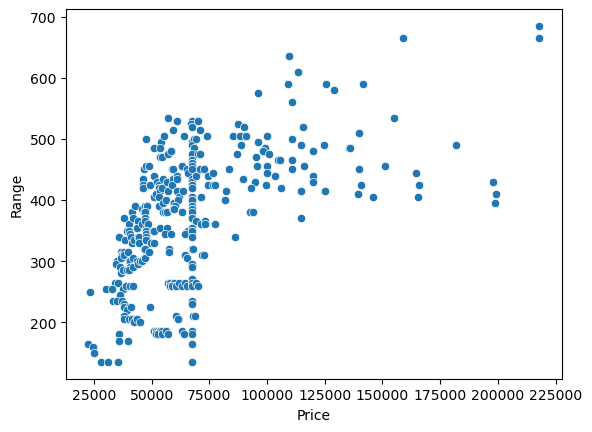

In [71]:
sns.scatterplot(x=evcars['Price'],y=evcars['Range']) 

<Axes: xlabel='Price', ylabel='Range'>

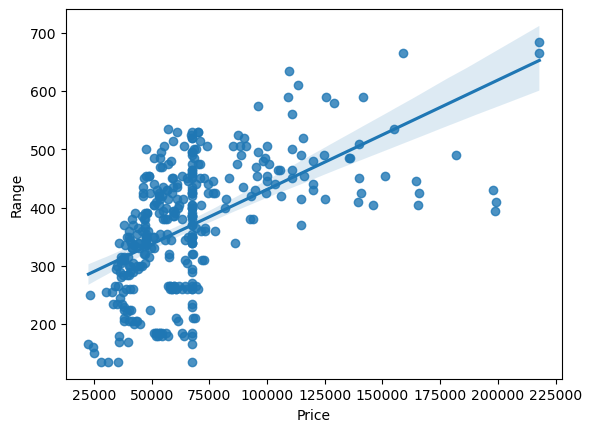

In [72]:
sns.regplot(x=evcars['Price'],y=evcars['Range']) 

<Axes: xlabel='Range', ylabel='Battery'>

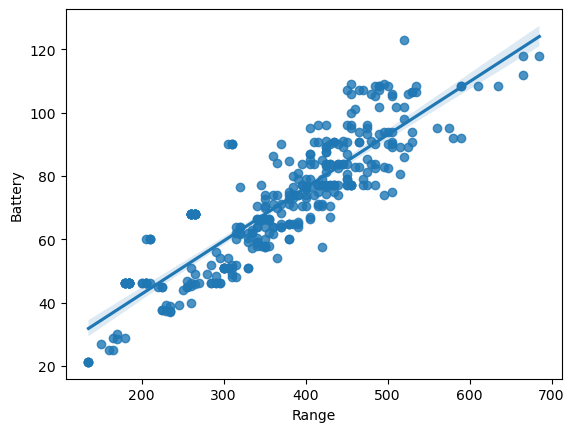

In [73]:
sns.regplot(x=evcars['Range'],y=evcars['Battery']) 

C:\Users\abdul\AppData\Local\Temp\ipykernel_804\2060806704.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=evcars['Top_speed'],shade=True)
c:\Users\abdul\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Top_speed', ylabel='Density'>

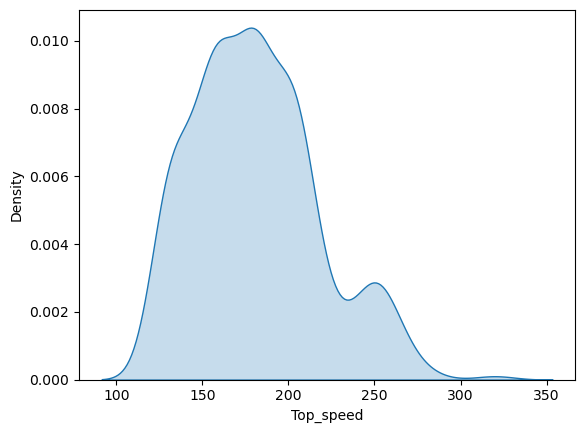

In [74]:
sns.kdeplot(data=evcars['Top_speed'],shade=True)

c:\Users\abdul\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\abdul\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\abdul\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\abdul\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

Text(0.5, 0, 'cars')

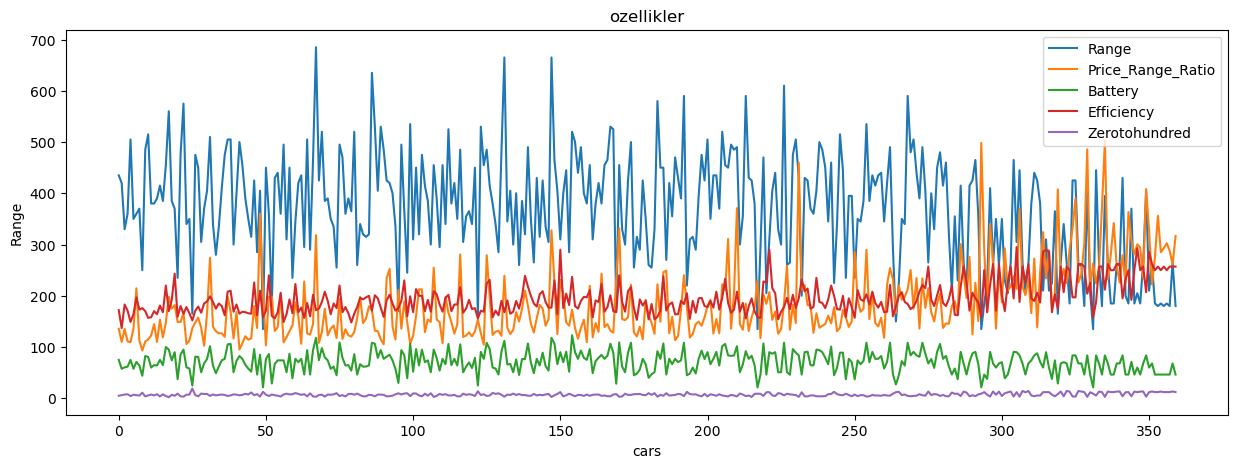

In [77]:
plt.figure(figsize=(15,5))
plt.title('ozellikler')
sns.lineplot(data=evcars['Range'],label='Range')
sns.lineplot(data=evcars['Price_Range_Ratio'],label='Price_Range_Ratio')
sns.lineplot(data=evcars['Battery'],label='Battery')
sns.lineplot(data=evcars['Efficiency'],label='Efficiency')
sns.lineplot(data=evcars['Zerotohundred'],label='Zerotohundred')
plt.xlabel('cars')
